### Simple UMAP example
This notebook shows you how to run a UMAP projection on the MNIST dataset, as well as plot the loss, and save the model.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ["KERAS_BACKEND"] = "torch"

### load data

In [3]:
from torchvision import datasets, transforms

# Download and load the MNIST dataset
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

# Convert PyTorch tensor to NumPy array
train_images = mnist_train.data.numpy()
train_labels = mnist_train.targets.numpy()
train_images = train_images.reshape((train_images.shape[0], -1))/255.
train_images.shape, train_labels.shape

((60000, 784), (60000,))

### create parametric umap model

In [4]:
from umap.parametric_umap import ParametricUMAP

/n/groups/datta/tim_sainburg/conda_envs/parametricumap/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
embedder = ParametricUMAP(n_epochs = 50, verbose=True)

In [6]:
embedding = embedder.fit_transform(train_images)

ParametricUMAP()
Fri May 17 10:13:45 2024 Construct fuzzy simplicial set
Fri May 17 10:13:45 2024 Finding Nearest Neighbors
Fri May 17 10:13:45 2024 Building RP forest with 17 trees
Fri May 17 10:13:50 2024 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Fri May 17 10:14:01 2024 Finished Nearest Neighbor Search
Fri May 17 10:14:03 2024 Construct embedding
Epoch 1/10
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - loss: 0.2301 - umap_loss: 0.2301
Epoch 2/10
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - loss: 0.1893 - umap_loss: 0.1893
Epoch 3/10
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - loss: 0.1834 - umap_loss: 0.1834
Epoch 4/10
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - loss: 0.1808 - umap_loss: 0.1808
Epoch 5/10
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - loss: 0.1796 - umap_loss: 0.1796
Epoch 6/10
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - loss: 0.1790 - umap_loss: 0.1790
Epoch 7/10
1905/1

### plot results

In [7]:
import matplotlib.pyplot as plt

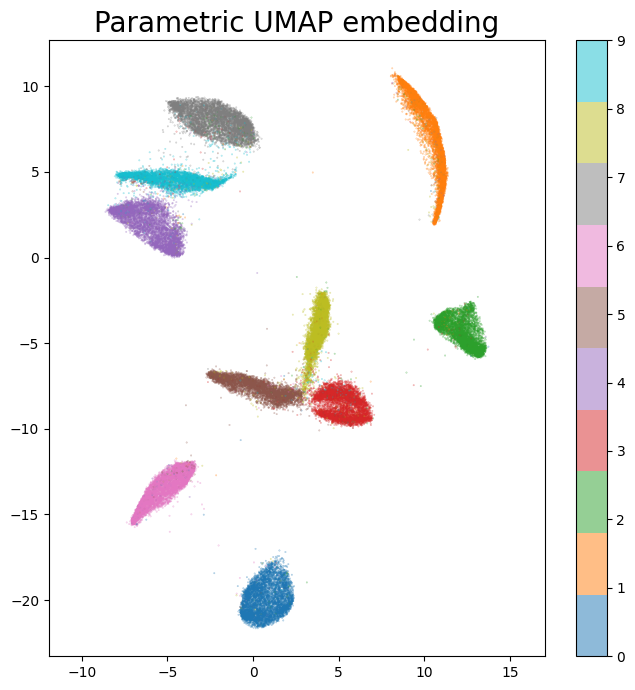

In [8]:
fig, ax = plt.subplots( figsize=(8, 8))
sc = ax.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=train_labels,
    cmap="tab10",
    s=0.1,
    alpha=0.5,
    rasterized=True,
)
ax.axis('equal')
ax.set_title("Parametric UMAP embedding", fontsize=20)
plt.colorbar(sc, ax=ax);

### plotting loss

In [9]:
embedder._history.keys()

dict_keys(['loss'])

Text(0.5, 0, 'Epoch')

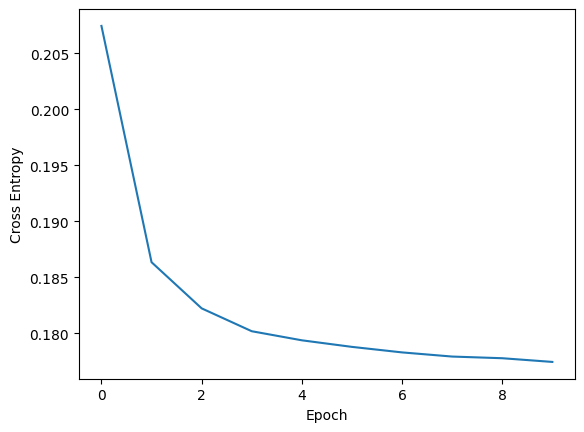

In [10]:
fig, ax = plt.subplots()
ax.plot(embedder._history['loss'])
ax.set_ylabel('Cross Entropy')
ax.set_xlabel('Epoch')

### saving and loading

In [11]:
import os
import tempfile
import shutil

In [12]:
from umap.parametric_umap import load_ParametricUMAP

In [13]:
# Create a temporary directory
tmpdir = tempfile.mkdtemp()
# Define the model save path
model_save_path = os.path.join(tmpdir, 'model')
os.makedirs(model_save_path)

In [14]:
embedder.save(model_save_path)

Keras encoder model saved to /tmp/tmpnbsgt855/model/encoder.keras
Keras full model saved to /tmp/tmpnbsgt855/model/parametric_model.keras
Thu May 16 17:27:28 2024 Worst tree score: 0.59231667
Thu May 16 17:27:28 2024 Mean tree score: 0.60575784
Thu May 16 17:27:28 2024 Best tree score: 0.61593333
Thu May 16 17:27:30 2024 Forward diversification reduced edges from 900000 to 384210
Thu May 16 17:27:32 2024 Reverse diversification reduced edges from 384210 to 384210
Thu May 16 17:27:35 2024 Degree pruning reduced edges from 421012 to 421009
Thu May 16 17:27:35 2024 Resorting data and graph based on tree order
Thu May 16 17:27:35 2024 Building and compiling search function
Thu May 16 17:27:44 2024 Building and compiling search function
Pickle of ParametricUMAP model saved to /tmp/tmpnbsgt855/model/model.pkl


In [15]:
embedder = load_ParametricUMAP(model_save_path)

Thu May 16 17:27:47 2024 Building and compiling search function
Pickle of ParametricUMAP model loaded from /tmp/tmpnbsgt855/model/model.pkl
Keras encoder model loaded from /tmp/tmpnbsgt855/model/encoder.keras


In [16]:
test = embedder.transform(train_images)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [17]:
# Clean up the temporary directory
shutil.rmtree(tmpdir)